Dataset: https://www.kaggle.com/patjob/articlescrape

**NO EJECUTAR**


In [1]:
import textblob
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
import nltk

from nltk.collocations import *
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
remove = ('headers', 'footers', 'quotes')
data = fetch_20newsgroups(subset='all', remove=remove)

In [4]:
df = pd.DataFrame({'text':data.data}) # makes a dataframe with our training data
df['text'] = df['text'].str.lower().str.split() # This splits words by space

In [5]:
df.head()

,text
0,"[i, am, sure, some, bashers, of, pens, fans, a..."
1,"[my, brother, is, in, the, market, for, a, hig..."
2,"[finally, you, said, what, you, dream, about.,..."
3,"[think!, it's, the, scsi, card, doing, the, dm..."
4,"[1), i, have, an, old, jasmine, drive, which, ..."


In [6]:
stop = nltk.corpus.stopwords.words('english')
df['text'] = df['text'].apply(lambda x: [item for item in x if item not in stop])

stemmer = SnowballStemmer("english")
df['text'] = df['text'].apply(lambda x: [stemmer.stem(y) for y in x])

df['text'] = df['text'].apply(lambda x: ' '.join(x))
df.head()

,text
0,sure basher pen fan pretti confus lack kind po...
1,brother market high-perform video card support...
2,final said dream about. mediterranean???? new....
3,think! scsi card dma transfer disks... scsi ca...
4,1) old jasmin drive cannot use new system. und...


In [7]:
df = df.dropna()
df['text'] = df['text'].str.replace(r'\W', ' ', case = False)
df['text'] = df['text'].str.replace(r'[.,?<>-]', '')
df.head()

/var/folders/v7/c6sbyd55641cz8n4fnk6bvjm0000gn/T/ipykernel_4855/3323121872.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'\W', ' ', case = False)
/var/folders/v7/c6sbyd55641cz8n4fnk6bvjm0000gn/T/ipykernel_4855/3323121872.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'[.,?<>-]', '')


,text
0,sure basher pen fan pretti confus lack kind po...
1,brother market high perform video card support...
2,final said dream about mediterranean new ...
3,think scsi card dma transfer disks scsi ca...
4,1 old jasmin drive cannot use new system und...


In [8]:
vectorizer = TfidfVectorizer(max_df=0.9,
                            stop_words='english')
X = vectorizer.fit_transform(df['text'])
X

<18846x129931 sparse matrix of type '<class 'numpy.float64'>'
	with 1195274 stored elements in Compressed Sparse Row format>

In [146]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [147]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("\nCluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end=''),
    print


print("\n")
print("Prediction")

# Y = vectorizer.transform(["This Motorbike has the best chain"])
# prediction = model.predict(Y)
# print(prediction)

# Y = vectorizer.transform(["Turkey is close to Israel"])
# prediction = model.predict(Y)
# print(prediction)

Y = vectorizer.transform(["Violence"])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:

Cluster 0:
 think like peopl know use say time god make good
Cluster 1:
 drive card pleas mail anyon thank use know thanks monitor
Cluster 2:
 window file use program key run dos problem know version

Prediction
[0]


In [148]:
k_means_labels = model.labels_
k_means_labels

array([0, 1, 0, ..., 1, 0, 0], dtype=int32)

In [149]:
unique, counts = np.unique(k_means_labels, return_counts=True)
dict(zip(unique, counts))

{0: 13767, 1: 3162, 2: 1917}

In [150]:
df['label'] = k_means_labels

In [151]:
def cos_distance(u, v): 
    """
    Function to take two documents, calculate the cosine distance between them
    """ 
    return np.dot(u,v) / (sqrt(np.dot(u,u)) * sqrt(np.dot(v,v)))

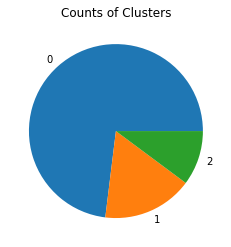

In [152]:
plt.pie(counts, labels=unique)
plt.title('Counts of Clusters')
plt.show()

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2, random_state=1)
result = pca.fit_transform(X.toarray())

In [ ]:
x, y = result[:, 0], result[:, 1]

In [ ]:
plt.scatter(x, y, c=['red', 'green'])
plt.title('Clusters')
plt.show()